#### Predicting the prices using ...

In [10]:
import pandas
import matplotlib.pyplot as plt

% matplotlib inline
file = 'prices/market-price.blockchain.info.csv'
df = pandas.read_csv(file, 
                     header=None, 
                     names=['Date', 'Close Price'],
                     index_col='Date',
                     parse_dates=True,
                     na_values=['nan'])

# select only some dates using an index and an inner join 
dates = pandas.date_range('2016/10/01', '2016/10/31')
selected_df = pandas.DataFrame(index=dates)
selected_df = selected_df.join(df)  # how='inner' inverts

In [3]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import datetime

def predict_price(dates, prices, x):
    # a Support Vector Regression (SVM for classification and regression)
    
    # dates = np.reshape(dates, (len(dates), 1))  # converting to matrix of n X 1

    print(len(dates))
    print(len(prices))

    svr_lin = SVR(kernel='linear', C=1e3, verbose=False)
    # svr_poly = SVR(kernel='poly', C=1e3, degree=2, verbose=True)
    # svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1, verbose=True)  # defining the support vector regression models
    
    print('start fitting ' + str(datetime.datetime.now()))
    svr_lin.fit(dates, prices)
    print('end fitting ' + str(datetime.datetime.now()))
    # svr_rbf.fit(dates, prices)  # fitting the data points in the models
    # svr_poly.fit(dates, prices)

    from sklearn.externals import joblib
    joblib.dump(svr_lin, 'data/svr_lin.pkl')

    # plt.scatter(dates, prices, color='black', label='Data')  # plotting the initial datapoints
    # 
    # plt.plot(dates, svr_lin.predict(dates), color='green',
    #          label='Linear model')  # plotting the line made by linear kernel
    # # plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')  # plotting the line made by the RBF kernel
    # # plt.plot(dates, svr_poly.predict(dates), color='blue',
    # #          label='Polynomial model')  # plotting the line made by polynomial kernel
    # plt.xlabel('Date')
    # plt.ylabel('Price')
    # plt.title('Support Vector Regression')
    # plt.legend()
    # plt.show()

    # return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

# as np array
# print(selected_df['Close Price'].values)
# print(selected_df.index.values)

# convert np.datetime64 as datetime.datetime # http://stackoverflow.com/a/29753985/2692914
# import datetime
# d = datetime.datetime.utcfromtimestamp(selected_df.index.values[0].astype(datetime.datetime)/1e9)
# print(d)
# print(d.date())

# http://stackoverflow.com/a/29753985/2692914
dts = selected_df.index.values.astype(datetime.datetime)/1e9
# print(np.asarray(dts, dtype=int))
predict_price(np.asarray(dts, dtype=int), selected_df['Close Price'].values.tolist(), 29)

# ds = [datetime.datetime.utcfromtimestamp(dt).date() for dt in dts.tolist()]
# predict_price(ds, selected_df['Close Price'].values.tolist(), 29)
# predict_price(dts, selected_df['Close Price'].values.tolist(), 29)

# ds = datetime.datetime.utcfromtimestamp()
# print(ds)
# print(ds.date())

# datetime.datetime.utcfromtimestamp(d)
# print()

# # as list
# print(selected_df['Close Price'].tolist())
# print(selected_df.index.tolist())

# predict_price(selected_df.index.values, selected_df['Close Price'].values, 29)

31
31
start fitting 2016-12-03 23:21:39.121725


In [8]:
from sklearn.svm import SVR
import numpy as np

n_samples, n_features = 10, 5
np.random.seed(0)
y = np.random.randn(n_samples)
print('y')
print(y)
X = np.random.randn(n_samples, n_features)
print('X')
print(X)
# clf = SVR(C=1.0, epsilon=0.2)
clf = SVR(C=1e3, epsilon=0.2)
clf.fit(X, y)
print('done')

y
[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
X
[[ 0.14404357  1.45427351  0.76103773  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462]
 [-1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]
 [ 0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215]
 [ 0.15634897  1.23029068  1.20237985 -0.38732682 -0.30230275]
 [-1.04855297 -1.42001794 -1.70627019  1.9507754  -0.50965218]
 [-0.4380743  -1.25279536  0.77749036 -1.61389785 -0.21274028]
 [-0.89546656  0.3869025  -0.51080514 -1.18063218 -0.02818223]
 [ 0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117]]
done


In [4]:
### USING DATE AS X 
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn.externals import joblib
from sklearn.svm import SVR


% matplotlib inline
file = 'prices/market-price.blockchain.info.csv'
df = pandas.read_csv(file,
                     header=None,
                     names=['Date', 'Close Price'],
                     index_col='Date',
                     parse_dates=True,
                     na_values=['nan'])

# select only some dates using an index and an inner join 
dates = pandas.date_range('2016/10/01', '2016/10/31')
selected_df = pandas.DataFrame(index=dates)
selected_df = selected_df.join(df)  # how='inner' inverts

dts = selected_df.index.values.astype(datetime.datetime) / 1e9
X = np.asarray(dts, dtype=int)
X = np.reshape(X, (len(X), 1))
y = np.asarray(selected_df['Close Price'])

print("X %d items" % len(X))
# print(X)
print("y %d items" % len(y))
# print(y)

clf = SVR(kernel='rbf', C=1.0, epsilon=0.2)
clf.fit(X, y)
joblib.dump(clf, 'data/rbf.pkl')

print('done')
# clf.predict()
# clf = SVR(kernel='linear', C=1e3, verbose=False)

X 31 items
y 31 items
done


X 31 items
y 31 items
start svr linear fitting 2016-12-04 01:07:11.979443
end svr linear fitting 2016-12-04 01:07:12.074571
start svr poly fitting 2016-12-04 01:07:12.074571


end svr poly fitting 2016-12-04 01:11:38.450219
start svr rbf fitting 2016-12-04 01:11:38.450219
end svr rbf fitting 2016-12-04 01:11:38.484297


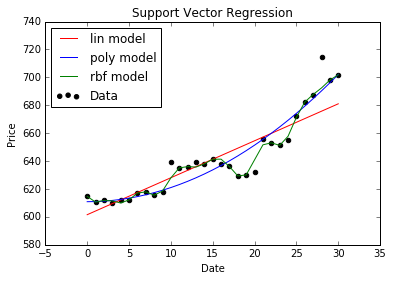

done


In [15]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas
from sklearn.externals import joblib
from sklearn.svm import SVR


% matplotlib inline
file = 'prices/market-price.blockchain.info.csv'
df = pandas.read_csv(file,
                     header=None,
                     names=['Date', 'Close Price'],
                     index_col='Date',
                     parse_dates=True,
                     na_values=['nan'])

# select only some dates using an index and an inner join 
dates = pandas.date_range('2016/10/01', '2016/10/31')
selected_df = pandas.DataFrame(index=dates)
selected_df = selected_df.join(df)  # how='inner' inverts

dts = selected_df.index.values.astype(datetime.datetime) / 1e9
X = np.arange(0, len(y))
X = np.reshape(X, (len(X), 1))  # n samples x m features in this case n x 1
y = np.asarray(selected_df['Close Price'])

print("X %d items" % len(X))
# print(X)
print("y %d items" % len(y))
# print(y)

# clf = SVR(kernel='rbf', C=1.0, epsilon=0.2)
# clf = SVR(kernel='rbf', C=1e3, epsilon=0.2)
clf_lin = SVR(kernel='linear', C=1e3)
clf_poly = SVR(kernel='poly', C=1e3, degree=2)
clf_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

print('start svr linear fitting ' + str(datetime.datetime.now()))
clf_lin.fit(X, y)
joblib.dump(clf_lin, 'data/lin.pkl')
print('end svr linear fitting ' + str(datetime.datetime.now()))

print('start svr poly fitting ' + str(datetime.datetime.now()))
clf_poly.fit(X, y)
joblib.dump(clf_poly, 'data/poly.pkl')
print('end svr poly fitting ' + str(datetime.datetime.now()))

print('start svr rbf fitting ' + str(datetime.datetime.now()))
clf_rbf.fit(X, y)
joblib.dump(clf_rbf, 'data/rbf.pkl')
print('end svr rbf fitting ' + str(datetime.datetime.now()))

plt.scatter(X, y, color='black', label='Data')  # plotting the initial datapoints
plt.plot(X, clf_lin.predict(X), color='red', label='lin model')
plt.plot(X, clf_poly.predict(X), color='blue', label='poly model')
plt.plot(X, clf_rbf.predict(X), color='green', label='rbf model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend(loc='upper left')
plt.show()

print('done')
# clf.predict(31)

# clf = SVR(kernel='linear', C=1e3, verbose=False)

In [53]:
import codecs
import pickle

pkz_file = 'data/sentiment/all.pkz'
with open(pkz_file, 'rb') as f:
    compressed_content = f.read()
sentiment = pickle.loads(codecs.decode(compressed_content, 'zlib_codec'))

# keys = sorted(sentiment.keys())
# keys = sentiment.keys()
# for key in keys:
#     print(key, sentiment[key])

# header=None,
# names=['Date', 'Close Price'],
# index_col='Date',
# parse_dates=True,
# na_values=['nan']
sentiment_df = pandas.DataFrame(
    [[v['Verynegative'] if 'Verynegative' in v else 0,
      v['Negative'] if 'Negative' in v else 0,
      v['Neutral'] if 'Neutral' in v else 0,
      v['Positive'] if 'Positive' in v else 0,
      v['Verypositive'] if 'Verypositive' in v else 0] for k, v in sentiment.items()],
    columns=['Verynegative', 'Negative', 'Neutral', 'Positive', 'Verypositive'], 
    index=[datetime.datetime.strptime(k, '%Y%m%d').date() for k in sentiment.keys()]
)
sentiment_df = sentiment_df.sort_index(ascending=True)
sentiment_df.head()

,Verynegative,Negative,Neutral,Positive,Verypositive
2016-10-01,22,334,38,66,5
2016-10-02,23,515,71,102,2
2016-10-03,43,508,69,103,1
2016-10-04,43,736,127,129,2
2016-10-05,49,613,69,101,4


In [54]:
import codecs
import pickle

pkz_file = 'data/sentiment/all.pkz'
with open(pkz_file, 'rb') as f:
    compressed_content = f.read()
sentiment = pickle.loads(codecs.decode(compressed_content, 'zlib_codec'))

sentiment_df = pandas.DataFrame(
    [[v['Verynegative'] if 'Verynegative' in v else 0,
      v['Negative'] if 'Negative' in v else 0,
      v['Neutral'] if 'Neutral' in v else 0,
      v['Positive'] if 'Positive' in v else 0,
      v['Verypositive'] if 'Verypositive' in v else 0] for k, v in sentiment.items()],
    columns=['Verynegative', 'Negative', 'Neutral', 'Positive', 'Verypositive'], 
    index=[datetime.datetime.strptime(k, '%Y%m%d').date() for k in sentiment.keys()]
)
sentiment_df = sentiment_df.sort_index(ascending=True)
# df.head()

file = 'prices/market-price.blockchain.info.csv'
df = pandas.read_csv(file,
                     header=None,
                     names=['Date', 'Close Price'],
                     index_col='Date',
                     parse_dates=True,
                     na_values=['nan'])

# select only some dates using an index and an inner join 
dates = pandas.date_range('2016/10/01', '2016/10/31')
selected_df = pandas.DataFrame(index=dates)
selected_df = selected_df.join(df)  # how='inner' inverts
selected_df = selected_df.join(sentiment_df)  # how='inner' inverts
selected_df.head()

,Close Price,Verynegative,Negative,Neutral,Positive,Verypositive
2016-10-01,614.823800,22,334,38,66,5
2016-10-02,610.518912,23,515,71,102,2
2016-10-03,611.851100,43,508,69,103,1
2016-10-04,609.624812,43,736,127,129,2
2016-10-05,612.352287,49,613,69,101,4


In [5]:
import numpy as np
import codecs
import pickle
import pandas
import datetime

pkz_file = 'data/sentiment/all.pkz'
with open(pkz_file, 'rb') as f:
    compressed_content = f.read()
sentiment = pickle.loads(codecs.decode(compressed_content, 'zlib_codec'))

sentiment_df = pandas.DataFrame(
    [[v['Verynegative'] if 'Verynegative' in v else 0,
      v['Negative'] if 'Negative' in v else 0,
      v['Neutral'] if 'Neutral' in v else 0,
      v['Positive'] if 'Positive' in v else 0,
      v['Verypositive'] if 'Verypositive' in v else 0] for k, v in sentiment.items()],
    columns=['Verynegative', 'Negative', 'Neutral', 'Positive', 'Verypositive'], 
    index=[datetime.datetime.strptime(k, '%Y%m%d').date() for k in sentiment.keys()]
)
sentiment_df = sentiment_df.sort_index(ascending=True)
# df.head()

file = 'prices/market-price.blockchain.info.csv'
df = pandas.read_csv(file,
                     header=None,
                     names=['Date', 'Close Price'],
                     index_col='Date',
                     parse_dates=True,
                     na_values=['nan'])

# select only some dates using an index and an inner join 
dates = pandas.date_range('2016/10/01', '2016/10/31')
selected_df = pandas.DataFrame(index=dates)
selected_df = selected_df.join(df)  # how='inner' inverts
selected_df = selected_df.join(sentiment_df)  # how='inner' inverts
selected_df.head()

# no es necesario los dìas
# podemos probar con las noticias de 1 dìa antes o del mismo dìa
# dts = selected_df.index.values.astype(datetime.datetime) / 1e9
# X:
# [
# sample1: [feature1 feature2 feature3 ...]
# sample2: [feature1 feature2 feature3 ...]
# ...
# ]
# X = selected_df.values
X = selected_df[['Verynegative', 'Negative', 'Neutral', 'Positive', 'Verypositive']].values
y = np.asarray(selected_df['Close Price'])
print(X.shape)
print(y.shape)

(31, 5)
(31,)


In [ ]:
from sklearn.externals import joblib
from sklearn.svm import SVR

print("X %d items" % len(X))
print("y %d items" % len(y))

clf_lin = SVR(kernel='linear', C=1e3)
clf_poly = SVR(kernel='poly', C=1e3, degree=2, verbose=True)
clf_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1, verbose=True)

# print('start svr linear fitting ' + str(datetime.datetime.now()))
# clf_lin.fit(X, y)
# joblib.dump(clf_lin, 'data/sentiment_lin.pkl')
# print('end svr linear fitting ' + str(datetime.datetime.now()))

print('start svr poly fitting ' + str(datetime.datetime.now()))
clf_poly.fit(X, y)
joblib.dump(clf_poly, 'data/sentiment_poly.pkl')
print('end svr poly fitting ' + str(datetime.datetime.now()))

print('start svr rbf fitting ' + str(datetime.datetime.now()))
clf_rbf.fit(X, y)
joblib.dump(clf_rbf, 'data/sentiment_rbf.pkl')
print('end svr rbf fitting ' + str(datetime.datetime.now()))

# plt.scatter(X, y, color='black', label='Data')  # plotting the initial datapoints
# plt.plot(X, clf_lin.predict(X), color='red', label='lin model')
# plt.plot(X, clf_poly.predict(X), color='blue', label='poly model')
# plt.plot(X, clf_rbf.predict(X), color='green', label='rbf model')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.title('Support Vector Regression')
# plt.legend(loc='upper left')
# plt.show()

In [22]:
import ast

output = 'CoreNLP request timed out. Your document may be too long.'
if type(output) is str:
    try:
        output = ast.literal_eval(output)
    except:
        if 'timed out' in output:
            print('timed out')

output = {'hello':0}
print(type(output))
print(type(output) is dict)

timed out
<class 'dict'>
True


In [23]:
import collections
contents = "abbb\nbcc"
counter = collections.Counter()
for sentence in contents.split():
    cnt = collections.Counter(sentence)
    counter += cnt
print(counter)

Counter({'b': 4, 'c': 2, 'a': 1})
